In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/itba-cifar-100-2024-q-1/y_train_fine.npy
/kaggle/input/itba-cifar-100-2024-q-1/y_train_coarse.npy
/kaggle/input/itba-cifar-100-2024-q-1/fine_label_names.pck
/kaggle/input/itba-cifar-100-2024-q-1/coarse_label_names.pck
/kaggle/input/itba-cifar-100-2024-q-1/x_test.npy
/kaggle/input/itba-cifar-100-2024-q-1/x_train.npy


Cargo datasets de train, test, y las clases fine (100) y coarse (20).

Divido por 255 para normalizar el RGB a algo entre 0.0 y 1.0

In [2]:
x_train = np.load("/kaggle/input/itba-cifar-100-2024-q-1/x_train.npy")
x_test = np.load("/kaggle/input/itba-cifar-100-2024-q-1/x_test.npy")/255.
y_train_coarse = np.load("/kaggle/input/itba-cifar-100-2024-q-1/y_train_coarse.npy")
y_train_fine = np.load("/kaggle/input/itba-cifar-100-2024-q-1/y_train_fine.npy")

In [3]:
import pickle
with open("/kaggle/input/itba-cifar-100-2024-q-1/fine_label_names.pck", "rb") as f:
    labels_fine = pickle.load(f)
with open("/kaggle/input/itba-cifar-100-2024-q-1/coarse_label_names.pck", "rb") as f:
    labels_coarse = pickle.load(f)

In [4]:
indices_train = np.arange(len(x_train))
np.random.shuffle(indices_train)

x_train = x_train[indices_train]
y_train_coarse = y_train_coarse[indices_train]
y_train_fine = y_train_fine[indices_train]

# EDA

### A ojo

In [78]:
x_train.shape # 50k imágenes, de 32x32 pixeles, RGB (3 canales)

(50000, 32, 32, 3)

In [79]:
x_test.shape # 10k imágenes, de 32x32 pixeles, RGB (3 canales)

(10000, 32, 32, 3)

In [80]:
labels_fine # 100 clases específicas

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [81]:
labels_coarse # 10 clases generales

['aquatic_mammals',
 'fish',
 'flowers',
 'food_containers',
 'fruit_and_vegetables',
 'household_electrical_devices',
 'household_furniture',
 'insects',
 'large_carnivores',
 'large_man-made_outdoor_things',
 'large_natural_outdoor_scenes',
 'large_omnivores_and_herbivores',
 'medium_mammals',
 'non-insect_invertebrates',
 'people',
 'reptiles',
 'small_mammals',
 'trees',
 'vehicles_1',
 'vehicles_2']

In [ ]:
# Composición de cada superclase
for i, coarse in enumerate(labels_coarse):
    print(f"Coarse label: {coarse}")
    for fine in np.unique(y_train_fine[y_train_coarse == i]):
        print(f"\tFine label: {labels_fine[fine]}")

In [ ]:
y_train_coarse.shape # Clasicaciones coarse para las 50k imágenes

In [ ]:
y_train_fine.shape # Clasificaciones fine para las 50k imágenes

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
%matplotlib inline

In [ ]:
image_to_test = 56;

plt.figure(figsize=(1,1))
plt.imshow(x_train[image_to_test])

print("coarse N°: " + str(y_train_coarse[image_to_test]))
print("fine N°: " + str(y_train_fine[image_to_test]))
print("")
print("coarse label: " + labels_coarse[y_train_coarse[image_to_test]])
print("fine label: " + labels_fine[y_train_fine[image_to_test]])
print("")

### Statistics & *fancy plots*

In [ ]:
fine_class_counts = Counter(y_train_fine)
fine_classes, fine_counts = zip(*sorted(fine_class_counts.items()))

coarse_class_counts = Counter(y_train_coarse)
coarse_classes, coarse_counts = zip(*sorted(coarse_class_counts.items()))

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(fine_classes, fine_counts, color='skyblue')
plt.xlabel('Fine Class')
plt.ylabel('Count')
plt.title('Distribution of Fine Classes')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(coarse_classes, coarse_counts, color='salmon')
plt.xlabel('Coarse Class')
plt.ylabel('Count')
plt.title('Distribution of Coarse Classes')
plt.show()

In [ ]:
print("Statistics of Fine Classes Distribution:")
print(f"Total classes: {len(fine_class_counts)}")
print(f"Average samples per class: {np.mean(list(fine_class_counts.values())):.2f}")
print(f"Standard deviation of samples per class: {np.std(list(fine_class_counts.values())):.2f}\n")

print("Statistics of Coarse Classes Distribution:")
print(f"Total classes: {len(coarse_class_counts)}")
print(f"Average samples per class: {np.mean(list(coarse_class_counts.values())):.2f}")
print(f"Standard deviation of samples per class: {np.std(list(coarse_class_counts.values())):.2f}")

#### t-SNE visualization

[TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE)

In [ ]:
x_train_flat = x_train[:2000].reshape(x_train[:2000].shape[0], -1)
tsne = TSNE(n_components=3, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_flat)

In [ ]:
print(x_train_flat.shape) # 2k imagenes con 3072 features
print(x_train_tsne.shape) # 2k imágenes con 3 festures

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], x_train_tsne[:, 2], c=y_train_fine[:2000], cmap='tab10', alpha=0.6)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_title("t-SNE visualization of CIFAR-100 (first 2000 images) in 3D")
ax.set_xlabel("t-SNE feature 1")
ax.set_ylabel("t-SNE feature 2")
ax.set_zlabel("t-SNE feature 3")
plt.show()

In [ ]:
fig = px.scatter_3d(
    x_train_tsne, x=0, y=1, z=2,
    color=y_train_fine[:2000],
    title="t-SNE visualization of CIFAR-100 (first 2000 images) in 3D",
    labels={'0': 't-SNE feature 1', '1': 't-SNE feature 2', '2': 't-SNE feature 3', 'color': 'Fine Class'}
)
fig.show()

## Data augmentation

[albumentations](https://www.kaggle.com/code/pritishmishra/augmentation-with-albumentations)

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import albumentations as A
import numpy as np
from functools import partial

In [ ]:
transforms = A.Compose([
    A.Rotate(limit=45),
    A.RandomBrightnessContrast(p=0.5),
    A.ImageCompression(quality_lower=80, quality_upper=100, p=0.5),
#     A.HueSaturationValue(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
#     A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
#     A.GridDistortion(),
#     A.OpticalDistortion(distort_limit=2, shift_limit=0.5),
#     A.GaussianBlur()
])

In [ ]:
class AAugmentationTf:
    
    def __init__(self, transform, image_size, batch_size=1):
        '''
        PARAMETERS
        ----------
        
        transform   : Albumentations augmentation pipeline of type
                      'albumentations.core.composition.Compose'
                   
        image_size  : size of the target image or after augmentation
        
        batch_size  : Batch size of the output tf dataset defaults to
        (default=30)  to 30.

        '''
        self.transform = transform
        self.image_size = image_size
        self.batch_size = batch_size


    def augment(self, ds):
        '''
        PARAMETERS
        ----------
        ds: Tensorflow Dataset 'tf.data.Dataset' with
            image & labels (mandatory)
        
        RETURNS
        -------
        ds_trans: Returns a tf dataset with augmentation 
                  pipeline applied.
        '''
        
        AUTOTUNE = tf.data.experimental.AUTOTUNE
        ds_trans = ds.map(partial(self._process_data), num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)
        ds_trans = ds_trans.map(self._set_shapes, num_parallel_calls=AUTOTUNE).\
        batch(self.batch_size).prefetch(AUTOTUNE)
        return ds_trans

        
    def _augment_func(self, image):
        if image.dtype == np.float64:
            image = image.astype(np.float32)
            
        transformed_image = self.transform(image=image)['image']
        transformed_image = tf.cast(transformed_image/255., tf.float32)
        return transformed_image

    
    def _process_data(self, image, label):
        transformed_image = tf.numpy_function(self._augment_func, inp=[image], Tout=tf.float32)
        return transformed_image, label

    
    def _set_shapes(self, img, label):
        img.set_shape(self.image_size)
        label.set_shape([])
        return img, label

In [ ]:
def augment_func(image):
    if image.dtype == np.float64:
        image = image.astype(np.float32)
        
    transformed_image = transform(image=image)['image']
    transformed_image = tf.cast(transformed_image, tf.float32)
    return transformed_image

def process_data(image, label, augment_func=augment_func):        
    transformed_image = tf.numpy_function(augment_func, inp=[image], Tout=tf.float32)
    return transformed_image, label

 def set_shapes(img, label):
        img.set_shape(self.image_size)
        label.set_shape([])
        return img, label

In [ ]:
dataset_train_tf = tf.data.Dataset.from_tensor_slices((x_train, y_train_fine))

In [ ]:
dataset_train_aug = dataset_train_tf.map(process_data)

In [ ]:
aug_tf = AAugmentationTf(transforms, (32, 32, 3)) # you can give any trasformation pipeline
ds_out = aug_tf.augment(dataset_train_tf)                       # input your dataset to augment()
ds_out

In [ ]:
# Iterar sobre todo el dataset
print(list(ds_out))
for image_batch, label_batch in ds_out.take(10):
    for image, label in zip(image_batch.numpy(), label_batch.numpy()):
        # Aquí puedes procesar cada imagen y su etiqueta
        print(f"Imagen shape: {image.shape}, Etiqueta: {label}")

In [ ]:
print(ds_out.as_numpy_iterator().shape)
image, label = next(iter(ds_out))
image = image.numpy()
label = label.numpy()
# print(label)
# print(image)
print(image.shape)
print(label.shape)

In [ ]:
for image, label in ds_out.take(5):  # Tomar las primeras 5 imágenes
    plt.figure(figsize=(1,1))
    plt.imshow(image.numpy())  # Convertir el tensor a un array numpy para mostrarlo
    plt.title(f"Label: {label.numpy()}")
    plt.show()

## imaug

In [6]:
from imgaug import augmenters as iaa
import random

In [8]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.CropAndPad(px=(-2, 2),sample_independently=True,pad_mode=["constant", "edge"]),
    iaa.Affine(shear=(-10, 10),mode = ['symmetric','wrap']),#48
    iaa.Add((-5, 5)),
    iaa.Multiply((0.8, 1.2)),

],random_order=True)

In [9]:
x_train2 = x_train.reshape(50000, 3, 32, 32).transpose(0,2,3,1)

In [10]:
X1 = seq.augment_images(x_train2)

In [ ]:
X2 = seq.augment_images(x_train2)

In [ ]:
X3 = seq.augment_images(x_train2)

In [ ]:
X4 = seq.augment_images(x_train2)

In [ ]:
# X5 = seq.augment_images(x_train2)
# X6 = seq.augment_images(x_train2)
# X7 = seq.augment_images(x_train2)
# X8 = seq.augment_images(x_train2)
# X9 = seq.augment_images(x_train2)
# X10 = seq.augment_images(x_train2)

In [11]:
x_train_all = []
x_train_all.extend(x_train2/255.0)
x_train_all.extend(X1/255.0)
# x_train_all.extend(X2/255.0)
# x_train_all.extend(X3/255)
# x_train_all.extend(X4/255)

In [12]:
y_train_all = []
y_train_all.extend(y_train_fine)
y_train_all.extend(y_train_fine)
# y_train_all.extend(y_train_fine)
# y_train_all.extend(y_train_fine)
# y_train_all.extend(y_train_fine)

In [13]:
print(len(x_train_all))
print(len(y_train_all))

100000
100000


In [14]:
x_train_final = []
y_train_final = []

combined = list(zip(x_train_all, y_train_all))
random.shuffle(combined)

x_train_final[:], y_train_final[:] = zip(*combined)

In [15]:
x_train_final = np.asarray(x_train_final)
y_train_final = np.asarray(y_train_final)

In [16]:
print(x_train_final.shape)
print(y_train_final.shape)

(100000, 32, 32, 3)
(100000,)


## ImageDataGenerator

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
train_aug = datagen.flow(x_train, batch_size=64)

## MLP Model

In [ ]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard
# %tensorboard --logdir logs

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard

In [65]:
model = Sequential()


model.add(Flatten())
model.add(Dense(256, activation='swish', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(128, activation='swish', use_bias=False))
model.add(BatchNormalization())
model.add(Dense(100, activation="softmax"))

# model.add(Flatten())
# model.add(Dense(64, activation='swish', kernel_constraint=max_norm(4)))
# model.add(Dropout(0.5))
# # model.add(BatchNormalization())
# model.add(Dense(64, activation='swish', kernel_constraint=max_norm(4)))
# model.add(Dropout(0.5))
# # model.add(BatchNormalization())
# # model.add(Dense(128, activation='swish', kernel_constraint=max_norm(4)))
# # model.add(BatchNormalization())
# model.add(Dense(100, activation="softmax"))


# model.add(Flatten())
# model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.1))
# model.add(Dense(256, activation="tanh"))
# model.add(BatchNormalization())
# # model.add(Dropout(0.8))
# # model.add(BatchNormalization())
# model.add(Dense(128, activation="selu"))
# model.add(Dropout(0.3))
# # model.add(BatchNormalization())
# model.add(Dense(64, activation="swish"))
# model.add(Dropout(0.8))
# # model.add(BatchNormalization())
# model.add(Dense(100, activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
rlrop = ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 1e-5
)

In [67]:
mc = ModelCheckpoint(
    ".weights.h5",
    monitor = "val_accuracy",
    verbose = 1,
    save_best_only = True,
    save_weights_only = True,
)

In [68]:
es = EarlyStopping(
    monitor = "val_accuracy",
    patience = 10, 
    verbose = 1,
    restore_best_weights = True,
)

In [69]:
history = model.fit(x=x_train_final, y=y_train_final, batch_size=64, epochs=50, validation_split=0.3, callbacks=[rlrop, es, mc])

Epoch 1/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0671 - loss: 4.2764
Epoch 1: val_accuracy improved from -inf to 0.08847, saving model to .weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.0671 - loss: 4.2763 - val_accuracy: 0.0885 - val_loss: 4.1005 - learning_rate: 0.0010
Epoch 2/50
1093/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1126 - loss: 3.9266
Epoch 2: val_accuracy improved from 0.08847 to 0.09933, saving model to .weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.1127 - loss: 3.9265 - val_accuracy: 0.0993 - val_loss: 4.0480 - learning_rate: 0.0010
Epoch 3/50
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1310 - loss: 3.8126
Epoch 3: val_accuracy improved from 0.09933 to 0.10850, saving model to .weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.1310 - loss: 3.8126 - val_accuracy: 0.1085 - val_loss: 4.0613 - learning_rate: 0.0010
Epoch 4/50
1091/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms

In [70]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 256)            │       786,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499,374 (9.53 MB)

 Trainable params: 832,868 (3.18 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 1,665,738 (6.35 MB)

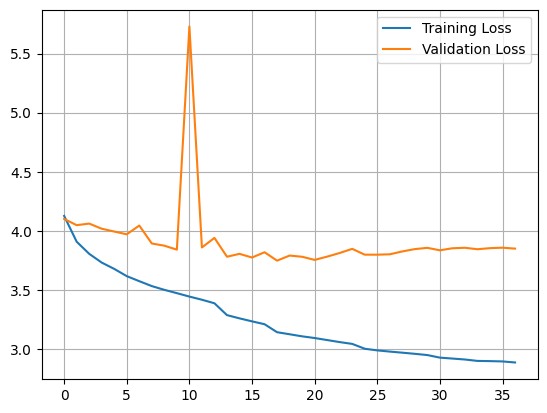

In [71]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.grid()
plt.legend()

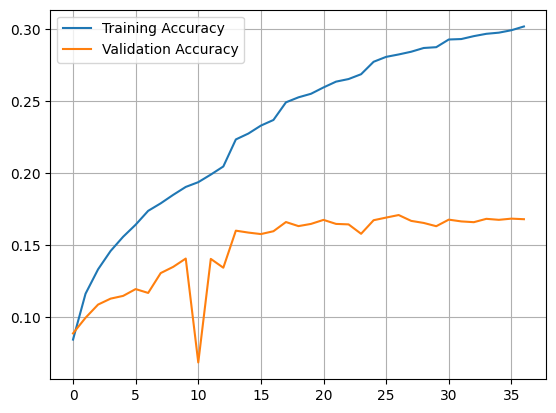

In [72]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.grid()
plt.legend()

In [73]:
predictions = model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [74]:
print(predictions.shape)
print(predictions[1])

(10000,)
78


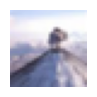

Prediction (fine): lamp




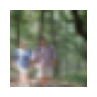

Prediction (fine): snake




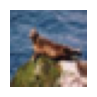

Prediction (fine): mushroom




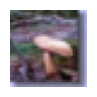

Prediction (fine): streetcar




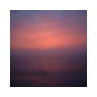

Prediction (fine): streetcar




In [75]:
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.show()
    
    fine_pred = predictions[i]
    print("Prediction (fine):", labels_fine[fine_pred])
    print("\n")

In [77]:
df = pd.DataFrame(predictions, columns=["Label"])
df.index.name = "Id"
df.head()
df.to_csv("submission.csv")